<a href="https://colab.research.google.com/github/fabiorfc/new_items/blob/main/Case_New_Items.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case New Items

___
## **Setup**
### **Basic Libraries**

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

#### **Get XGBoost**

In [2]:
!pip install xgboost
from xgboost import XGBClassifier

#### **Get OptimalBinning**

In [3]:
!pip install optbinning

#### **Get DataAnalyser**

In [4]:
!rm -f DataAnalyzer.py
!wget https://raw.githubusercontent.com/fabiorfc/new_items/main/DataAnalyzer.py

from DataAnalyzer import DataAnalyzer

--2025-07-27 19:33:47--  https://raw.githubusercontent.com/fabiorfc/new_items/main/DataAnalyzer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5047 (4.9K) [text/plain]
Saving to: ‘DataAnalyzer.py’

DataAnalyzer.py     100%[===================>]   4.93K  --.-KB/s    in 0s      

2025-07-27 19:33:47 (59.4 MB/s) - ‘DataAnalyzer.py’ saved [5047/5047]



#### **Get DataEngineer**

In [5]:
!rm -f DataEngineer.py
!wget https://raw.githubusercontent.com/fabiorfc/new_items/refs/heads/main/DataEngineer.py

from DataEngineer import FeatureEngineer

--2025-07-27 19:33:52--  https://raw.githubusercontent.com/fabiorfc/new_items/refs/heads/main/DataEngineer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3209 (3.1K) [text/plain]
Saving to: ‘DataEngineer.py’

DataEngineer.py     100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-07-27 19:33:52 (36.7 MB/s) - ‘DataEngineer.py’ saved [3209/3209]



____
## **1. Data reading**

In [6]:
url = "https://github.com/fabiorfc/new_items/raw/main/new_items_dataset.zip"

analyzer = DataAnalyzer(url)

data = analyzer.load_data_set()

/content/DataAnalyzer.py:20: DtypeWarning: Columns (10,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(f)


____
## **2. Data processing and analysis**

### **2.1 Statistical Summary**

In [7]:
print('-------------------------------------------------------------------------')
analyzer.statistical_summary()

-------------------------------------------------------------------------


,Total,Average,coef of var
price,5.252425e+09,52528.456969,16416.762640
base_price,5.506573e+09,55067.927890,15676.377656
sold_quantity,2.397020e+05,2.397116,1780.720202


### **2.2 Identifying Inconsistent Values**

Due to the short deadline for executing the case, the definition adopted for inconsistent data was that for which the `id` value is null.

In [8]:
print('-------------------------------------------------------------------------')
analyzer.identifying_inconsistent()
print('-------------------------------------------------------------------------')
print('--- Calculation of the number of lines with inconsistency    ')
data['inconsistence_rule'].value_counts()

-------------------------------------------------------------------------
The inconsistency rule was applied and a new column was added to the data.
-------------------------------------------------------------------------
--- Calculation of the number of lines with inconsistency    


,count
inconsistence_rule,
Consistent,99996
Inconsistent,4


In [9]:
print('-------------------------------------------------------------------------')
print('--- Checking inconsistent values    ')
data[['id','title','date_created','base_price','inconsistence_rule']].query("inconsistence_rule == 'Inconsistent'")

-------------------------------------------------------------------------
--- Checking inconsistent values    


,id,title,date_created,base_price,inconsistence_rule
3109,NaN,False,active,64938734.0,Inconsistent
26695,NaN,False,active,64938734.0,Inconsistent
93021,NaN,False,active,59340803.0,Inconsistent
93843,NaN,False,active,64938734.0,Inconsistent


### **2.3 Checking for outliers in price**

In [10]:
analyzer.marking_outliers('base_price')
analyzer.marking_outliers('price')

Calculation completed for base_price. Column with the outlier rule added to the dataset.
Calculation completed for price. Column with the outlier rule added to the dataset.


In [11]:
print('-------------------------------------------------------------------------')
print('--- Checking outlier for base_price    ')
data[['id','title','base_price','outlier_rule_for_base_price','inconsistence_rule']].query("outlier_rule_for_base_price != 'Normal'")

-------------------------------------------------------------------------
--- Checking outlier for base_price    


,id,title,base_price,outlier_rule_for_base_price,inconsistence_rule
3109,NaN,False,6.493873e+07,Outlier: High price,Inconsistent
20892,MLA584371588,Campo,1.111111e+09,Outlier: High price,Consistent
26695,NaN,False,6.493873e+07,Outlier: High price,Inconsistent
46139,MLA580898772,Bmw 335i Coupe M Sport Biturbo (306cv),1.111111e+09,Outlier: High price,Consistent
63243,MLA578815063,Oryzias Rice Fish Ideal Acuarios Plantados Ofe...,2.222222e+09,Outlier: High price,Consistent
72856,MLA580484531,Berlingo Multispace,1.234568e+08,Outlier: High price,Consistent
79030,MLA582088608,Vendemos Su Auto - Consulte,1.121111e+08,Outlier: High price,Consistent
93021,NaN,False,5.934080e+07,Outlier: High price,Inconsistent
93843,NaN,False,6.493873e+07,Outlier: High price,Inconsistent


In [12]:
print('-------------------------------------------------------------------------')
print('--- Checking outlier for price    ')
data[['id','title','base_price','outlier_rule_for_price','inconsistence_rule']].query("outlier_rule_for_price != 'Normal'")

-------------------------------------------------------------------------
--- Checking outlier for price    


,id,title,base_price,outlier_rule_for_price,inconsistence_rule
20892,MLA584371588,Campo,1.111111e+09,Outlier: High price,Consistent
46139,MLA580898772,Bmw 335i Coupe M Sport Biturbo (306cv),1.111111e+09,Outlier: High price,Consistent
63243,MLA578815063,Oryzias Rice Fish Ideal Acuarios Plantados Ofe...,2.222222e+09,Outlier: High price,Consistent
72856,MLA580484531,Berlingo Multispace,1.234568e+08,Outlier: High price,Consistent
79030,MLA582088608,Vendemos Su Auto - Consulte,1.121111e+08,Outlier: High price,Consistent


#### **2.4 Transforming the data_created field**

the objective here is to transform the date field to evaluate the response variable over time

In [13]:
analyzer.date_converters()

The date was converted and added to the dataset.


### **2.5 Identifying columns with concatenated data or json**
#### **Separating values that are concatenated in columns**

In [14]:
df_tags       = analyzer.parse_list_column('tags')
df_atributes  = analyzer.parse_nested_column('attributes')
df_variations = analyzer.parse_nested_column('variations')

# Extractins pictures
df_pictures   = analyzer.parse_nested_column('pictures')
# deleting columns with the term url e id
df_pictures.drop(df_pictures.filter(like = 'url').columns, axis = 1, inplace = True)
df_pictures.drop(df_pictures.filter(like = 'id').columns, axis = 1, inplace = True)

#### **Concatenating normalized data to the source table**

Here, the following is being executed:
1. Merging the normalized data into the original table
2. Deleting rows with inconsistent data
3. Dropping columns with concatenated data, either in JSON or the one that marks the inconsistent data

In [15]:
normalized_data = df_tags.merge(df_atributes, left_index=True, right_index=True, how = 'inner')
normalized_data = normalized_data.merge(df_variations, left_index=True, right_index=True, how = 'inner')
normalized_data = normalized_data.merge(df_pictures, left_index=True, right_index=True, how = 'inner')

data_with_normalized_trans = data.merge(normalized_data, left_index=True, right_index=True, how = 'inner')
data_with_normalized_trans = data_with_normalized_trans\
  .query("inconsistence_rule != 'Inconsistent'")\
  .drop(columns = ['tags', 'attributes', 'variations', 'pictures','date_created'])\
  .copy()

In [16]:
n_rows, n_cols = data_with_normalized_trans.shape

print('-------------------------------------------------------------------------')
print(f'--- The final base has {n_rows} rows and {n_cols} columns    ')

-------------------------------------------------------------------------
--- The final base has 99996 rows and 538 columns    


____
## **3. Defining the Case Study Objective**

This section will cover:

1. Case Study Objective
2. Defining the Response Variable (Target)
3. Descriptive analysis of the response variable
3. Data Separation for Application of the Machine Learning Algorithm

Here I'm using the f1 score. This metric is also the harmonic mean of precision and recall. Furthermore, its algebraic composition makes it more influenced by very low values, which will influence it if one precision or recall is very low while the other is very high.

Considering the business rule, I believe it's important that the model, starting from a cutoff point, captures the largest number of products whose sales exceeded the inventory relative to the total indicated (precision), but also, starting from that same cutoff point, captures a large portion of these same products.

### **3.1 Case Study Objective**

As assessed in the submitted database, there's a possibility that the quantity of products sold will exceed what's available in stock.

Therefore, the problem to be solved in this notebook will be to classify the products for which there's a higher probability that the quantity sold will exceed what's available in stock.

Defining the response variable: `sold_quantity > avaliable_quantity`

### **3.2 Defining the Response Variable (Target)**

In [19]:
data_with_normalized_trans[['sold_quantity','available_quantity']]
data_with_normalized_trans['target'] = np.where(data_with_normalized_trans['sold_quantity'] > data_with_normalized_trans['available_quantity'], 1.0, 0.0)

### **3.3 Descriptive analysis of the response variable**

In [22]:
target_total_analysis = pd.DataFrame(data_with_normalized_trans['target'].value_counts())
target_total_analysis['Relat. Freq'] = target_total_analysis['count'] / np.sum(target_total_analysis['count'])
target_total_analysis.columns = ['Abs. Freq.','Relat. Freq.']
target_total_analysis

,Abs. Freq.,Relat. Freq.
target,,
0.0,93611,0.936147
1.0,6385,0.063853


#### **Descriptive analysis over the time**

In [23]:
target_df_over_time = data_with_normalized_trans[['date_created_converted','target']]\
  .groupby('date_created_converted')\
  .mean()

target_df_over_time.reset_index(inplace = True)
target_df_over_time['date_created_converted'] = target_df_over_time['date_created_converted'].apply(lambda x: str(int(x)))

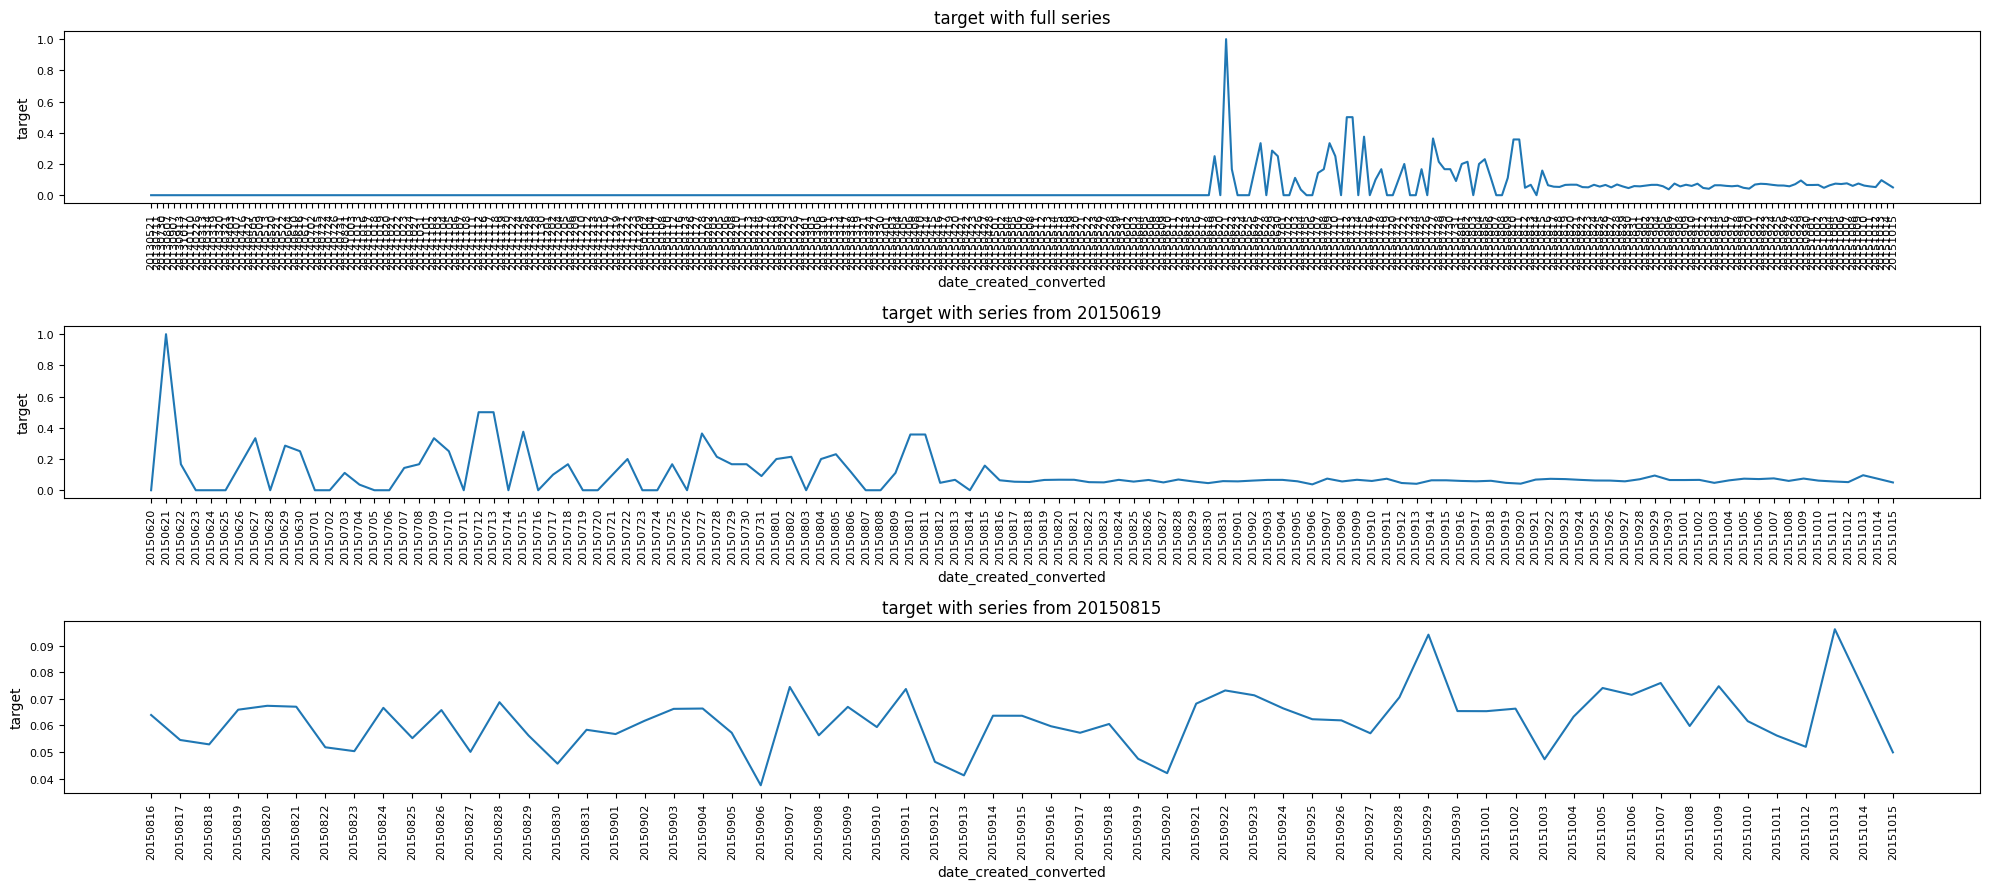

In [24]:
fig, axs = plt.subplots(3, 1, figsize = (20,9))

tab_vector = [target_df_over_time.copy(),
              target_df_over_time.query("date_created_converted > '20150619'").copy(),
              target_df_over_time.query("date_created_converted > '20150815'").copy()]

title_vector = ['target with full series','target with series from 20150619','target with series from 20150815',]

for i in range(3):
    sns.lineplot(data = tab_vector[i], x = 'date_created_converted', y = 'target', ax = axs[i])
    axs[i].set_title(title_vector[i], fontsize = 12)
    axs[i].tick_params(axis="x", rotation=90, labelsize=8)
    axs[i].tick_params(axis="y", labelsize=8)
plt.tight_layout()
plt.show()

____
#### **Considerations**

As can be seen from the graph of the target average over time, the series shows more stable behavior after 20150815.

Due to the short timeframe for the case, no testing was performed with periods other than those after 20150815.
____

### **3.3 Data Separation for Application of the Machine Learning Algorithm**

#### **Filtering dates greater than 20150815**

In [25]:
# filtering the series to select the period of greatest stability of the target
data_with_normalized_trans_filterd = data_with_normalized_trans.query("date_created_converted > 20150815").copy()

#### **Analysis of the filtered series**

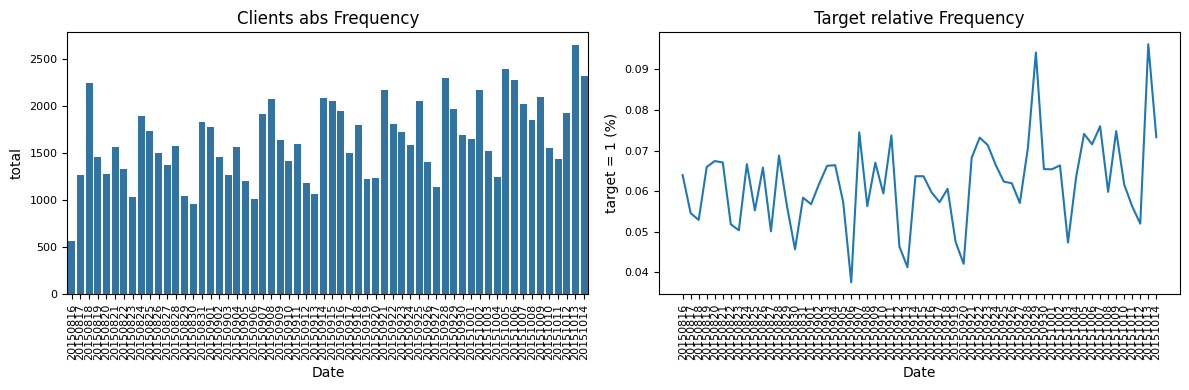

In [26]:
crosstable_with_target = pd.crosstab(data_with_normalized_trans_filterd['date_created_converted'],
                                     data_with_normalized_trans_filterd['target'],
                                     margins = True).iloc[:-1,:]

crosstable_with_target.reset_index(inplace = True)
crosstable_with_target.columns = ['Date','target = 0', 'target = 1', 'total']
crosstable_with_target['Date'] = crosstable_with_target['Date'].apply(lambda x: str(int(x)))
crosstable_with_target['target = 1 (%)'] = crosstable_with_target['target = 1'] / crosstable_with_target['total']
crosstable_with_target = crosstable_with_target.iloc[:-1,:]

fig, axs = plt.subplots(1, 2, figsize = (12,4))
sns.barplot(data = crosstable_with_target, x = 'Date', y = 'total', ax = axs[0])
sns.lineplot(data = crosstable_with_target, x = 'Date', y = 'target = 1 (%)', ax = axs[1])
axs[0].set_title('Clients abs Frequency', fontsize = 12); axs[1].set_title('Target relative Frequency', fontsize = 12)
axs[0].tick_params(axis="x", rotation=90, labelsize=8)  ; axs[1].tick_params(axis="x", rotation=90, labelsize=8)
axs[0].tick_params(axis="y", labelsize=8)               ; axs[1].tick_params(axis="y", labelsize=8)
plt.tight_layout()
plt.show()

#### **Separating the final base into training and testing**

In [27]:
out_of_time_sample = data_with_normalized_trans_filterd.query("date_created_converted > 20150908").copy()
train_and_holdout = data_with_normalized_trans_filterd.query("date_created_converted <= 20150908").copy()

In [28]:
# Extract feature names
features = data_with_normalized_trans_filterd.drop(['date_created_converted','category_id','seller_id','sold_quantity'], axis = 1).columns[2:-1]

# Split data
X_out_of_time       = out_of_time_sample[features]
y_out_of_time       = out_of_time_sample['target']

X_train_and_holdout = train_and_holdout[features]
y_train_and_holdout = train_and_holdout['target']

X_train, X_test, y_train, y_test = train_test_split(X_train_and_holdout,
                                                    y_train_and_holdout,
                                                    test_size=0.25,
                                                    random_state=132,
                                                    shuffle = True,
                                                    stratify = y_train_and_holdout)

## **3. 4 Feature engineering and constant feature drops**

In this section, I am:
1. Removing numeric variables with constant variance and categorical variables that have only a single category.
2. Replacing null values of numeric variables with -99999. The goal of this strategy is to make the decision trees of ensemble algorithms isolate these values and treat them differently, without mixing them with other values in the variable's domain.
3. For categorical variables, the variable's woe is being applied. This refers to the weight of evidence of each category, described as follows:

$
\text{WOE}_i = \ln\left( \frac{P[y = 0]}{P[y = 0]} \right)
$

In [29]:
fe = FeatureEngineer()

# Fit in training data
fe.fit(X_train, y_train)
X_train_transformed = fe.df

# Aplicar nas bases de validação e teste
X_test_transformed = fe.transform(X_test)
X_oot_transformed = fe.transform(X_out_of_time)

### **3.5 Eliminating unimportant features**

The method here is to input a random value to the data and fit the random forest model with many trees and reduced depth.

The goal here is to eliminate all features that have a lower feature importance than the uniform variable.

In [30]:
rng = np.random.default_rng(seed=132)

X_train_transformed['uniform_feature'] = rng.uniform(low=0.0, high=1.0, size=len(X_train_transformed))

rf_classifier = RandomForestClassifier(n_estimators = 1000, max_depth = 1, random_state=132, n_jobs = -1)
rf_classifier.fit(X_train_transformed, y_train)

feature_importance_df = pd.DataFrame({'Feature': X_train_transformed.columns , 'Importance' : rf_classifier.feature_importances_})
feature_importance_df.sort_values(by = 'Importance', ascending = False, inplace = True)
feature_importance_df.reset_index(drop = True, inplace = True)
feature_importance_df.query("Feature == 'uniform_feature'")

/tmp/ipython-input-30-528370156.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_transformed['uniform_feature'] = rng.uniform(low=0.0, high=1.0, size=len(X_train_transformed))


,Feature,Importance
64,uniform_feature,0.002


In [31]:
final_features = feature_importance_df.reset_index().query('index < 64')['Feature'].values

#### **selecting the variables to be passed through the previous feature selecton**

In [32]:
X_train_final = X_train_transformed[final_features].copy()
X_test_final  = X_test_transformed[final_features].copy()
X_oot_final   = X_oot_transformed[final_features].copy()

### **3.6 Fine tuning of hyperparameters**

#### **Fine tuning: `random_forest`**

In [33]:
test_01 = {'n_estimators' : [50, 100, 150],
           'max_depth' : [3, 5, 7],
           'min_impurity_decrease' : [0.000, 0.050, 0.100]} # min_impurity_decrease=0 f1 = 0.69

test_02 = {'n_estimators' : [125, 150, 175],
           'max_depth' : [5, 7, 9],
           'min_impurity_decrease' : [0.000]} # f1 = 0.72

test_03 = {'n_estimators' : [140, 150, 160],
           'max_depth' : [7, 9, 11],
           'min_impurity_decrease' : [0.000]} # f1 = 0.74

class_weight_values = len(y_train) / (2 * np.bincount(y_train))
class_weight_values = dict(zip([0,1], class_weight_values))

grid = GridSearchCV(RandomForestClassifier(class_weight = class_weight_values),
                    test_03, cv = 5, n_jobs = -1, scoring = 'f1')
grid.fit(X_train_final, y_train)
pd.DataFrame(grid.best_params_  , index = ['Values'])

,max_depth,min_impurity_decrease,n_estimators
Values,11,0.0,150


#### **Fine tuning: `XGBoost`**

In [34]:
test_01 = {'n_estimators' : [50, 100, 150],
           'max_depth' : [3, 5, 7],
           'learning_rate' : [0.000, 0.050, 0.100],
           'reg_lambda' : [0.000, 0.0001, 0.001]} # lambda = 0, max_depth=5 f1 = 0.765

test_02 = {'n_estimators' : [125, 150, 175],
           'max_depth' : [5, 7, 9],
           'learning_rate' : [0.050, 0.100, 0.200],
           'reg_lambda' : [0.000]} # lambda = 0, min_impurity_decrease=0, max_depth = 5, f1 = 0.808

test_03 = {'n_estimators' : [150, 175, 200],
           'max_depth' : [7, 9, 11],
           'learning_rate' : [0.100, 0.200, 0.300],
           'reg_lambda' : [0.000]} # lambda = 0, min_impurity_decrease=0, max_depth = 5, f1 = 0.810

grid = GridSearchCV(XGBClassifier(scale_pos_weight = y_train.value_counts().loc[0] / y_train.value_counts().loc[1]),
                    test_03, cv = 5, n_jobs = -1, scoring = 'f1')

grid.fit(X_train_final, y_train)
pd.DataFrame(grid.best_params_  , index = ['Values'])

,learning_rate,max_depth,n_estimators,reg_lambda
Values,0.2,11,150,0.0


___
## **4. fitting models**

fitting the model to the data using the hyperparameters evaluated in the previous section

### **4.1 Fitting `Random Forest`** *(I changed the hyperparameters to try to reduce the variance of the model)*

In [35]:
rf = RandomForestClassifier(max_depth = 3,
                            min_impurity_decrease = 0.0,
                            n_estimators = 150,
                            class_weight = class_weight_values)

rf.fit(X_train_final, y_train)

rf_train_score = rf.predict_proba(X_train_final)[:,1]
rf_test_score  = rf.predict_proba(X_test_final)[:,1]
rf_oot_score   = rf.predict_proba(X_oot_final)[:,1]

### **4.2 Fitting `XGBoost`** *(I changed the hyperparameters to try to reduce the variance of the model)*

In [36]:
xgb = XGBClassifier(n_estimators = 100,
                    max_depth = 3,
                    learning_rate = 0.2,
                    reg_lambda = 2.0,
                    scale_pos_weight = y_train.value_counts().loc[0] / y_train.value_counts().loc[1])

xgb.fit(X_train_final, y_train)

xgb_train_score = xgb.predict_proba(X_train_final)[:, 1]
xgb_test_score  = xgb.predict_proba(X_test_final)[:,1]
xgb_oot_score   = xgb.predict_proba(X_oot_final)[:,1]

### **4.3 Evaluating model performance**

In [37]:
rf_roc_auc = [roc_auc_score(y_train, rf_train_score),
              roc_auc_score(y_test, rf_test_score),
              roc_auc_score(y_out_of_time, rf_oot_score)]

xgb_roc_auc = [roc_auc_score(y_train, xgb_train_score),
               roc_auc_score(y_test, xgb_test_score),
               roc_auc_score(y_out_of_time, xgb_oot_score)]

pd.DataFrame({ 'Sample' : ['Training','Holdout','Out of time'],
              'Random Forest' : rf_roc_auc,
               'XGBoosting' : xgb_roc_auc})

,Sample,Random Forest,XGBoosting
0,Training,0.960494,0.992485
1,Holdout,0.832445,0.812377
2,Out of time,0.811440,0.797070


### **4.4 Build table of results**

In [38]:
# Random Forest results
rf_df_results = pd.DataFrame({'Score' : rf_train_score, 'Target' : y_train, 'Sample' : 'Train'})
rf_df_results = pd.concat([rf_df_results, pd.DataFrame({'Score' : rf_test_score, 'Target' : y_test, 'Sample' : 'Holdout'})])
rf_df_results = pd.concat([rf_df_results, pd.DataFrame({'Score' : rf_oot_score, 'Target' : y_out_of_time, 'Sample' : 'Out of Time'})])

# XGB results
xg_df_results = pd.DataFrame({'Score' : xgb_train_score, 'Target' : y_train, 'Sample' : 'Train'})
xg_df_results = pd.concat([rf_df_results, pd.DataFrame({'Score' : xgb_test_score, 'Target' : y_test, 'Sample' : 'Holdout'})])
xg_df_results = pd.concat([rf_df_results, pd.DataFrame({'Score' : xgb_oot_score , 'Target' : y_out_of_time, 'Sample' : 'Out of Time'})])

### **4.5 Analysing final Score**

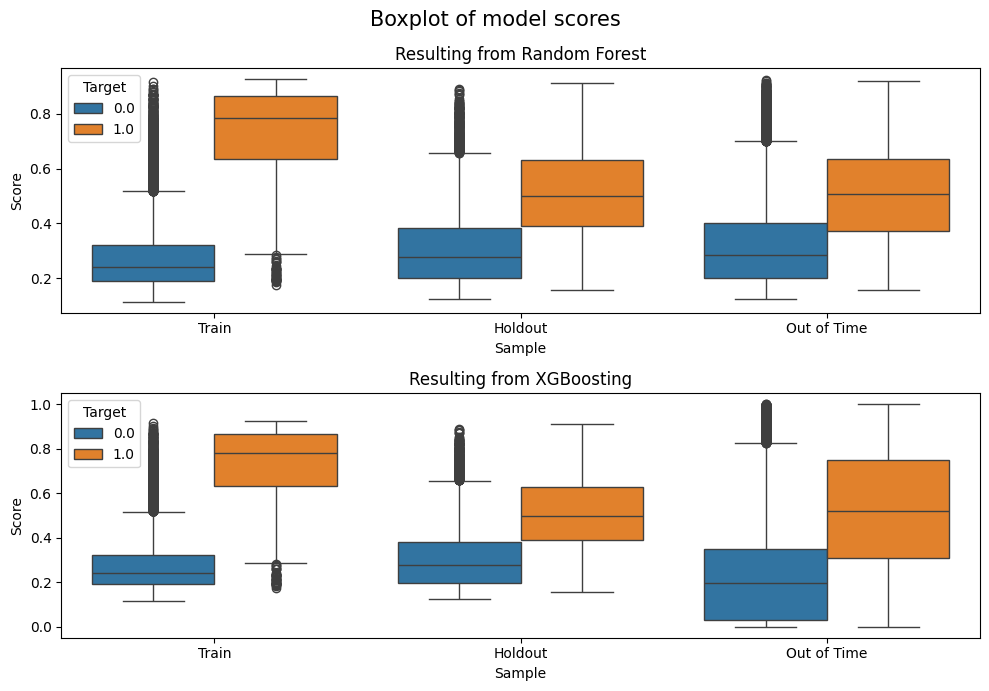

In [39]:
fig, axs = plt.subplots(2, 1, figsize = (10, 7))

sns.boxplot(data = rf_df_results, y = 'Score', x = 'Sample', hue = 'Target', ax = axs[0])
sns.boxplot(data = xg_df_results, y = 'Score', x = 'Sample', hue = 'Target', ax = axs[1])
plt.suptitle('Boxplot of model scores', fontsize = 15)
axs[0].set_title('Resulting from Random Forest')
axs[1].set_title('Resulting from XGBoosting')
plt.tight_layout()
plt.show()

### **4.6 More important features for `Random Forest`**

In [40]:
rf_feat_importances = pd.DataFrame({'Feature': X_train_final.columns,
                                    'Importance': np.round(rf.feature_importances_, 3)}).sort_values(by='Importance', ascending=False)
rf_feat_importances['Importance (%)'] = 100*rf_feat_importances['Importance'] / np.sum(rf_feat_importances['Importance'])
rf_feat_importances.head(10)

,Feature,Importance,Importance (%)
1,max_size_1,0.189,18.937876
2,warranty,0.154,15.430862
0,max_size_2,0.131,13.126253
6,seller_loyalty,0.117,11.723447
3,size_1,0.077,7.715431
15,is_new,0.076,7.615230
5,max_size_3,0.050,5.010020
14,seller_city,0.033,3.306613
8,size_2,0.031,3.106212
7,max_size_4,0.031,3.106212


### **4.7 More important features for `XGBoost`**

In [41]:
xgb_feat_importances = pd.DataFrame({'Feature': X_train_final.columns,
                                    'Importance': np.round(xgb.feature_importances_, 3)}).sort_values(by='Importance', ascending=False)
xgb_feat_importances['Importance (%)'] = 100*xgb_feat_importances['Importance'] / np.sum(xgb_feat_importances['Importance'])
xgb_feat_importances.head(10)

,Feature,Importance,Importance (%)
1,max_size_1,0.217,21.635094
15,is_new,0.145,14.456630
6,seller_loyalty,0.108,10.767697
0,max_size_2,0.105,10.468594
2,warranty,0.104,10.368894
20,tags_0,0.065,6.480558
14,seller_city,0.043,4.287138
5,max_size_3,0.041,4.087737
4,initial_quantity,0.016,1.595214
7,max_size_4,0.015,1.495513


___
# **Final Considerations**

## **Comparison between the models**
Both models presented low bias and high variance, but Random Forest presented lower variance than XGBoosting.

## **Model Vulnerabilities**
* Both models presented high variance.
* XGBoosting presented low bias, overfitting the data.
* Regarding Random Forest, although it presented lower variance, this method also presented overfit.

## **Opportunities for Improvement**
Due to the short timeframe to complete the project, I consider it important to:
1. Review the input features to create new information or adopt other techniques to fill in missing data.
2. I consider it important to calibrate the scores so that the final curves are no longer asymmetric.

## **Monitoring the Variables**
To monitor the variables, one suggestion might be to calculate the PSI (Population Stability Index) and monitor it over time. If PSI values exceed 0.1 or 0.2, the input variables should be revisited to understand what is changing in terms of audience distribution.